<a href="https://colab.research.google.com/github/AirPro/Module5HandsOnRNNFreidrd/blob/main/Mod5HandsOnRNNFreidrd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Class Module 5 Hands On Assignment Recurrent Neural Netowrks
By: Robert Freid <br>
This exercise demonstrates the use of a Recurrent Neural Network Notebook for the demonstration of the priciples taught in our Deep Learning class.

In [1]:
# Mount Google Drive 
# Uncomment to activate
# from google.colab import drive
# drive.mount('/content/drive')

## Import Requried Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image #to read image data
import os
# to split training and testing data
from sklearn.model_selection import train_test_split 
from keras.models import Sequential, load_model
from keras.layers import Conv1D, MaxPool1D, Dense, Flatten, Dropout

## Load the Dataset Files into a pandas Data Frame
Path to .scv file: <br>
/content/drive/MyDrive/DepressionData/SaYoPillow.csv

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DepressionData/SaYoPillow.csv')

## Print the Data Shape

In [4]:
print('Train data size =  ', df.shape )

train_rows, columns = df.shape 

Train data size =   (630, 9)


## Count and Extract the labels column of the data.

In [5]:
labels_count = df['sl'].value_counts()
print(labels_count) 

3    126
1    126
0    126
2    126
4    126
Name: sl, dtype: int64


## Display labels_count Values in a Bar Plot

<BarContainer object of 5 artists>

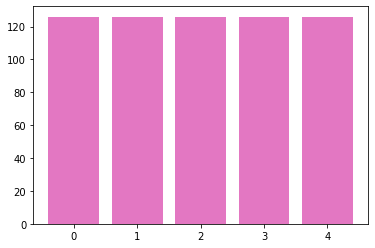

In [6]:
import seaborn as sn
plt.bar(labels_count.index, labels_count.values, color = sn.color_palette()[6]) 

## Print Head, Seperate Dataset, Set Up Train Test Split

In [7]:
print('Display the first 5 rows.')
print(df.head())
print('Convert Column Values to List')
x = list(df.columns.values.tolist())
print('Differentiate Features from Target Labels - Classes')
y = x[columns - 1]
X = df[x[0:columns - 1]]
y = df[y]
print('Train Test Split')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 4)

Display the first 5 rows.
      sr      rr       t      lm      bo    rem   sr.1     hr  sl
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20   3
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76   3
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   1
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84   3
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   0
Convert Column Values to List
Differentiate Features from Target Labels - Classes
Train Test Split


## Convert Data Into Float as Numpy Array

In [8]:
from keras.utils import to_categorical
from keras import metrics

X_train = np.array(X_train)
X_train = X_train.astype(np.float64)

X_test = np.array(X_test)
X_test = X_test.astype(np.float64)

print('Verify convert Data')
print(X_train.shape)
print(X_test.shape)

Verify convert Data
(504, 8)
(126, 8)


## Normalize the Data

In [9]:
import tensorflow as tf

for i in range(0,8):
  X_train[:,i]=tf.keras.utils.normalize(X_train[:,i], axis=-1, order=2)
  X_test[:,i]=tf.keras.utils.normalize(X_test[:,i], axis=-1, order=2)

## Prepare the Labels to One Hot Encoder and the Entire Data Set to Numpy Array

In [10]:
from keras import metrics
# Convert data into float as numpy array
import tensorflow as tf

X_train = np.array(X_train)
X_train= X_train.astype(np.float64)

X_test = np.array(X_test)
X_test= X_test.astype(np.float64)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Implement the Model

In [12]:
from keras.utils.vis_utils import plot_model
from keras.layers import Input

from keras.models import Model, Sequential

from keras.layers import SimpleRNN,BatchNormalization, MaxPooling1D


model = Sequential()


model.add(Conv1D(8, 2, padding='same', kernel_initializer='he_uniform',input_shape = (X_train.shape[1],1)))
model.add(MaxPooling1D(pool_size=2))

# Eigth alteration of model to imrpove prediction add additional model parameter

model.add(Conv1D(8, 2, padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(16, 2, padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(16, 2, padding='same', kernel_initializer='he_uniform'))


model.add(Flatten())

model.add(Dense(32, activation='relu'))

# Add dropout at .2
model.add(Dropout(0.2)) # dropout rate: 0.2

model.add(Dense(5, activation='softmax'))

## Model Summary

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 8)              24        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 8)             0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 8)              136       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 8)             0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 16)             272       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 16)            0

## Display and Plot the Model

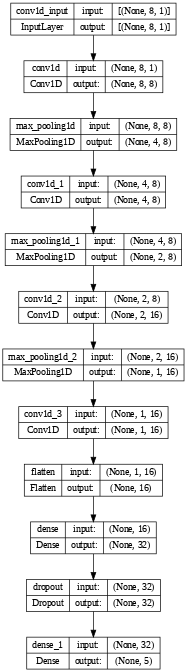

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='basic_model_plot_improve_8.png', dpi=50,show_shapes=True, show_layer_names=True)

## Compile the Model

In [15]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Set Batch Size and Epoch Number

In [16]:
batchSize = 32 # Original Value: 32
epochs_num = 20 # Original Value: 20

## Train the Model

In [17]:
history= model.fit(X_train, y_train, epochs=epochs_num, batch_size=batchSize, validation_split=0.2, shuffle= True)

Epoch 1/20
13/13 [==============================] - 2s 32ms/step - loss: 1.5957 - accuracy: 0.2680 - val_loss: 1.6114 - val_accuracy: 0.3168
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 1.5837 - accuracy: 0.3648 - val_loss: 1.5965 - val_accuracy: 0.3069
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 1.5665 - accuracy: 0.4094 - val_loss: 1.5818 - val_accuracy: 0.3069
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 1.5464 - accuracy: 0.4194 - val_loss: 1.5554 - val_accuracy: 0.3861
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 1.5120 - accuracy: 0.4566 - val_loss: 1.5203 - val_accuracy: 0.3861
Epoch 6/20
13/13 [==============================] - 0s 9ms/step - loss: 1.4674 - accuracy: 0.5012 - val_loss: 1.4630 - val_accuracy: 0.3861
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 1.4065 - accuracy: 0.5161 - val_loss: 1.3859 - val_accuracy: 0.4257
Epoch 8/20
13/13 [=

## Train versus Validation Loss

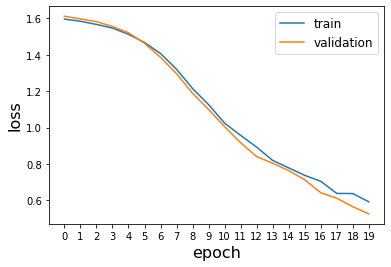

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper right', fontsize ='large')
plt.ylabel('loss',fontsize=16)
plt.xlabel('epoch',fontsize=16)
plt.yticks()
plt.xticks(np.arange(0, epochs_num))
plt.show()

## Train versus Validation Accuracy

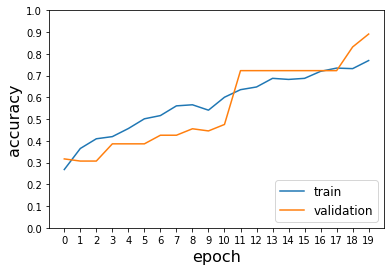

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.yticks(np.arange(0.0, 1.05,0.1))#, step=0.5))
plt.xticks(np.arange(0, epochs_num))# +1 ))#+10, step=10))
plt.legend(['train', 'validation'], loc='lower right', fontsize ='large')
plt.show()

## Test the Model

In [20]:
pred_test= model.predict(X_test)
y_pred = pred_test.round()
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

4/4 [==============================] - 0s 3ms/step
Accuracy on test data: 0.5476190447807312% 
 Error on test data: 0.4523809552192688


## Decode the One Hot Encoder Back to Labels

In [21]:
decoded_y_test = tf.argmax(y_test, axis=1)
decoded_prediction = tf.argmax(pred_test, axis=1)

print(decoded_y_test.shape)
print(decoded_prediction.shape)

(126,)
(126,)


## Confusion Matrix

In [22]:
tf.math.confusion_matrix(decoded_y_test,decoded_prediction)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[20,  0,  0,  0,  0],
       [30,  0,  0,  0,  0],
       [ 0,  1, 14,  1,  0],
       [ 0,  0,  0,  5, 25],
       [ 0,  0,  0,  0, 30]], dtype=int32)>

## Seaborn Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

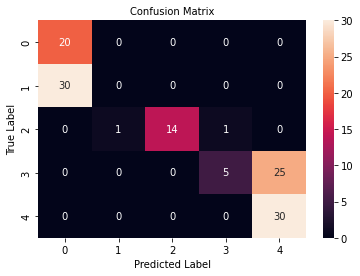

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(decoded_y_test,decoded_prediction)

sn.heatmap(cm,annot=True)#,fmt="d",xticklabels=labels["Name"],yticklabels=labels["Name"],cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix", fontsize=10)